This is code to process the notebooks in `/examples`. It should be turned into a script at some point. It updates README.md and examples.md

In [1]:
import nbformat
from nbconvert import RSTExporter
from os import listdir
from os.path import splitext

rst_exporter = RSTExporter()

In [2]:
def read_example(fname):
    path = "../examples/" + fname + ".ipynb"
    nb1 = nbformat.read(file(path), as_version=4)
    cells = nb1['cells']
    title = cells[0]['source']
    text = cells[2]['source']
    
    (_, resources) = rst_exporter.from_notebook_node(nb1)
    outs = resources['outputs']
    if len(outs) > 0:
        last_res = outs.keys()[-1]
        last_image = outs[last_res]
    else:
        last_image = None
    
    return title, text, last_image

In [38]:
root = "https://github.com/cstjean/ScikitLearn.jl/tree/master"
img_markup = """ <a href="{root}/examples/{nb_name}.ipynb"><img src="{root}/docs/example_images/{img_name}.png" alt="{title}" width="170"> </a> """
readme_text = file("../docs/README_text.md").read()
with file("../README.md", "w") as readme, file("../docs/examples.md", "w") as examples:
    examples.write("The examples below are in Julia, there are many more [in Python](http://scikit-learn.org/stable/auto_examples/index.html)\n\n")
    examples.write("Example | Description\n")
    examples.write("---|---\n")
    for filename in listdir("../examples/"):
        fname, ext = splitext(filename)
        if ext == ".ipynb":
            title, text, last_image = read_example(fname)
            if last_image:
                # Use the last_image for the gallery
                with file("../docs/example_images/"+fname+".png", "wb") as image_f:
                    image_f.write(last_image)
                img_name = fname
            else:
                img_name = "Text_image"
            markup = img_markup.format(root="{root}", nb_name=fname, img_name=img_name, title=title)
            text_ascii = text.encode("ascii", "ignore").replace("\n", " ")
            readme.write(markup.format(root="."))
            examples.write("%s | %s\n" % (markup.format(root=root), text_ascii))
    readme.write("\n\n"+readme_text)

---

Not part of the script, but kinda neat:

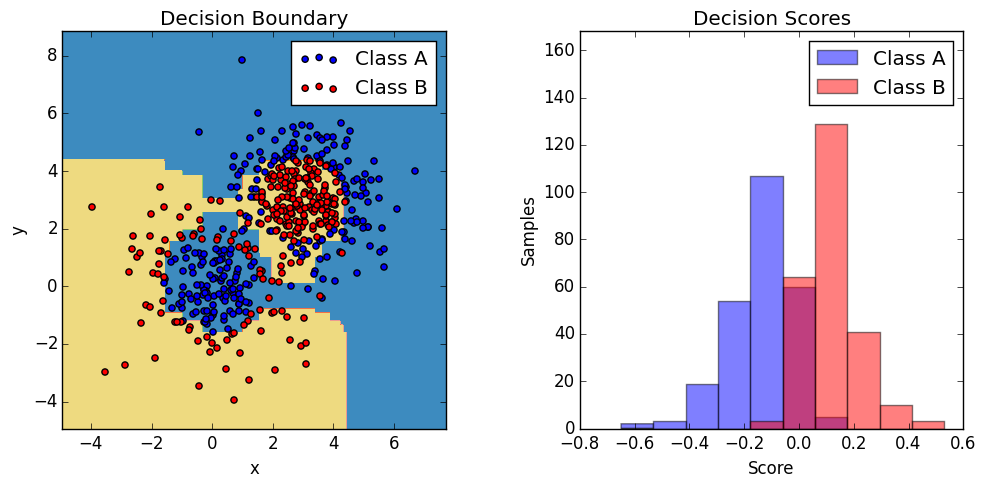

In [10]:
from IPython.display import Image
Image(data=resources['outputs']['output_4_0.png'], format='png')